# Introduction 
***
Running a simulation with GillesPy2 requires only 2 components: a model (data), and a solver (algorithm).
***
## Setup the Environment
***
'os' and 'sys' allow us to modify the directory Python searches for source code. If you wish to use an installed GillesPy2 package, you do not need to run this cell. If this notebook is being run from within the GillesPy2 source code directory we need to let Python know that we want to use it, not the GillesPy2 package.

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))

Import the types that'll be needed to define your Model.

In [2]:
import gillespy2

***
## Creating a GillesPy2 Model
***
A GillesPy2 model must include species, rates, and reactions.

Your model is declared and configured as a Python class. As such, the name between can be of your choosing. For this example we'll be modeling a Michaelis-Menten enzymatic reaction, so lets set the name accordingly.

In [3]:
def create_michaelis_menten(parameter_values=None):
    # Intialize the Model with a name of your choosing.
    model = gillespy2.Model(name="Michaelis_Menten")

    """
    Variables (GillesPy2.Species) can be anything that participates in or is produced by a reaction channel.

    - name: A user defined name for the species.
    - initial_value: A value/population count of species at start of simulation.
    """
    A = gillespy2.Species(name="A", initial_value=301)
    B = gillespy2.Species(name="B", initial_value=120)
    C = gillespy2.Species(name="C", initial_value=0)
    D = gillespy2.Species(name="D", initial_value=0)

    # Add the Variables to the Model.
    model.add_species([A, B, C, D])

    """
    Parameters are constant values relevant to the system, such as reaction kinetic rates.

    - name: A user defined name for reference.
    - expression: Some constant value.
    """
    rate1 = gillespy2.Parameter(name="rate1", expression=0.0017)
    rate2 = gillespy2.Parameter(name="rate2", expression=0.5)
    rate3 = gillespy2.Parameter(name="rate3", expression=0.1)

    # Add the Parameters to the Model.
    model.add_parameter([rate1, rate2, rate3])

    """
    Reactions are the reaction channels which cause the system to change over time.

    - name: A user defined name for the reaction.
    - reactants: A dictionary with participant reactants as keys, and consumed per reaction as value.
    - products: A dictionary with reaction products as keys, and number formed per reaction as value.
    - rate: A parameter rate constant to be applied to the propensity of this reaction firing.
    - propensity_function: Can be used instead of rate in order to declare a custom propensity function in string format.
    """
    r1 = gillespy2.Reaction(
            name="r1",
            reactants={'A': 1, 'B': 1}, 
            products={'C': 1},
            rate='rate1'
        )

    r2 = gillespy2.Reaction(
            name="r2",
            reactants={'C': 1}, 
            products={'A': 1, 'B': 1},
            rate='rate2'
        )

    r3 = gillespy2.Reaction(
            name="r3",
            reactants={'C': 1}, 
            products={'B': 1, 'D': 1},
            rate='rate3'
        )

    # Add the Reactions to the Model.
    model.add_reaction([r1, r2, r3])

    # Define the timespan of the model.
    tspan = gillespy2.TimeSpan.linspace(t=100, num_points=100)
    
    # Set the timespan of the Model.
    model.timespan(tspan)
    return model

### Instantiate the Model

In [4]:
model = create_michaelis_menten()

***
## Running the Simulation
***
Run a stochastic simulation on the Model and store the results in the `results` variable. GillesPy2 will use the best solver for the Model if no solver is declared (see below).

In [5]:
results = model.run()

### You can find a more thorough list of `model.run()` arguments in [the documentation](https://stochss.github.io/GillesPy2/classes/gillespy2.core.html#gillespy2.core.model.Model.run) to customize the behavior of your simulations.
***
## Visualizations
***
Plot the results of the simulation. 

There are a multitude of arguments that can be set to tweak the behavior and visuals of the plot.  For now though, lets run it with default settings.

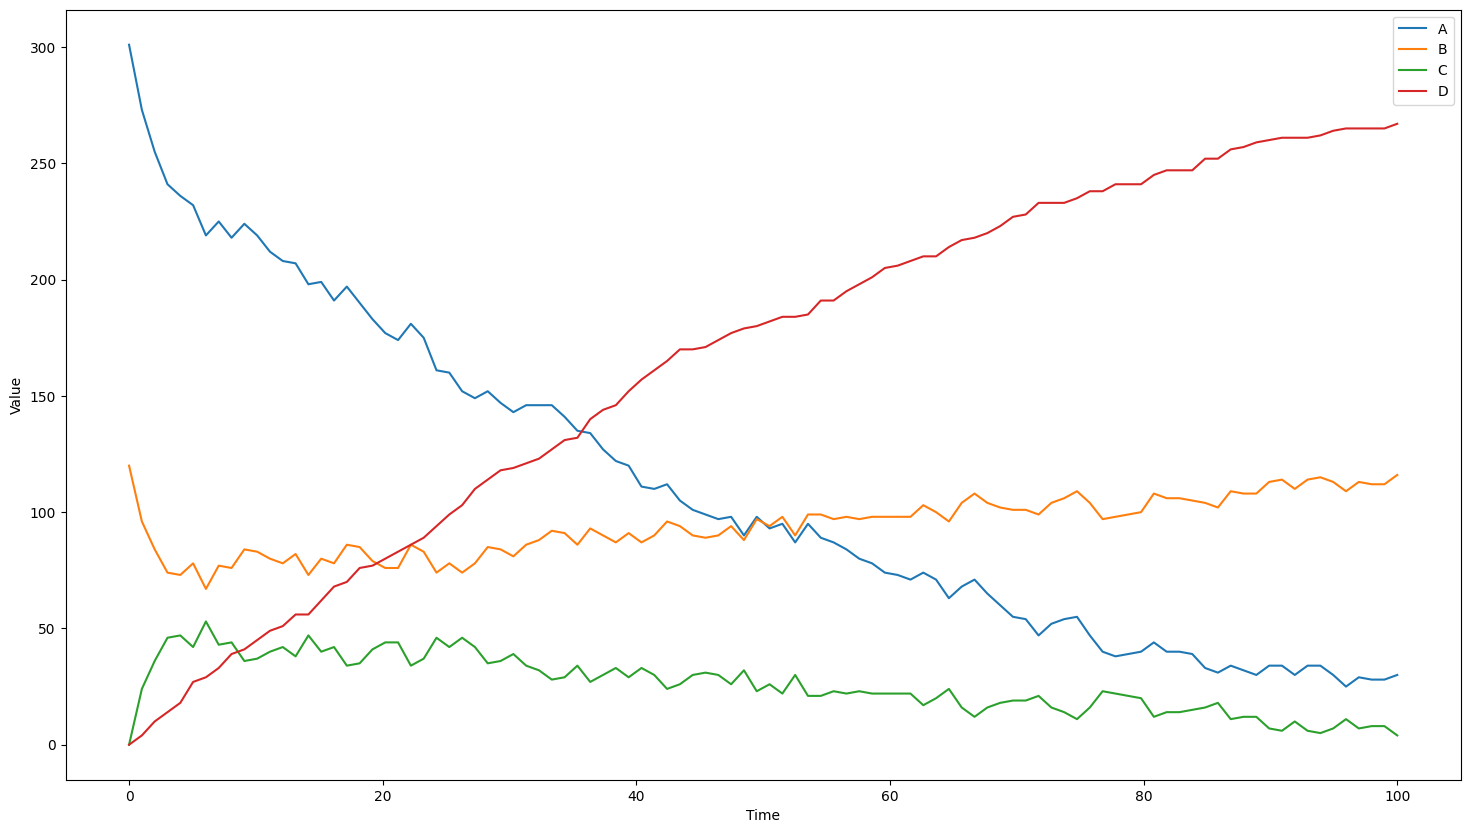

In [6]:
results.plot()

That plot is somewhat boring though, so lets add some labels, a title, and some decorations.

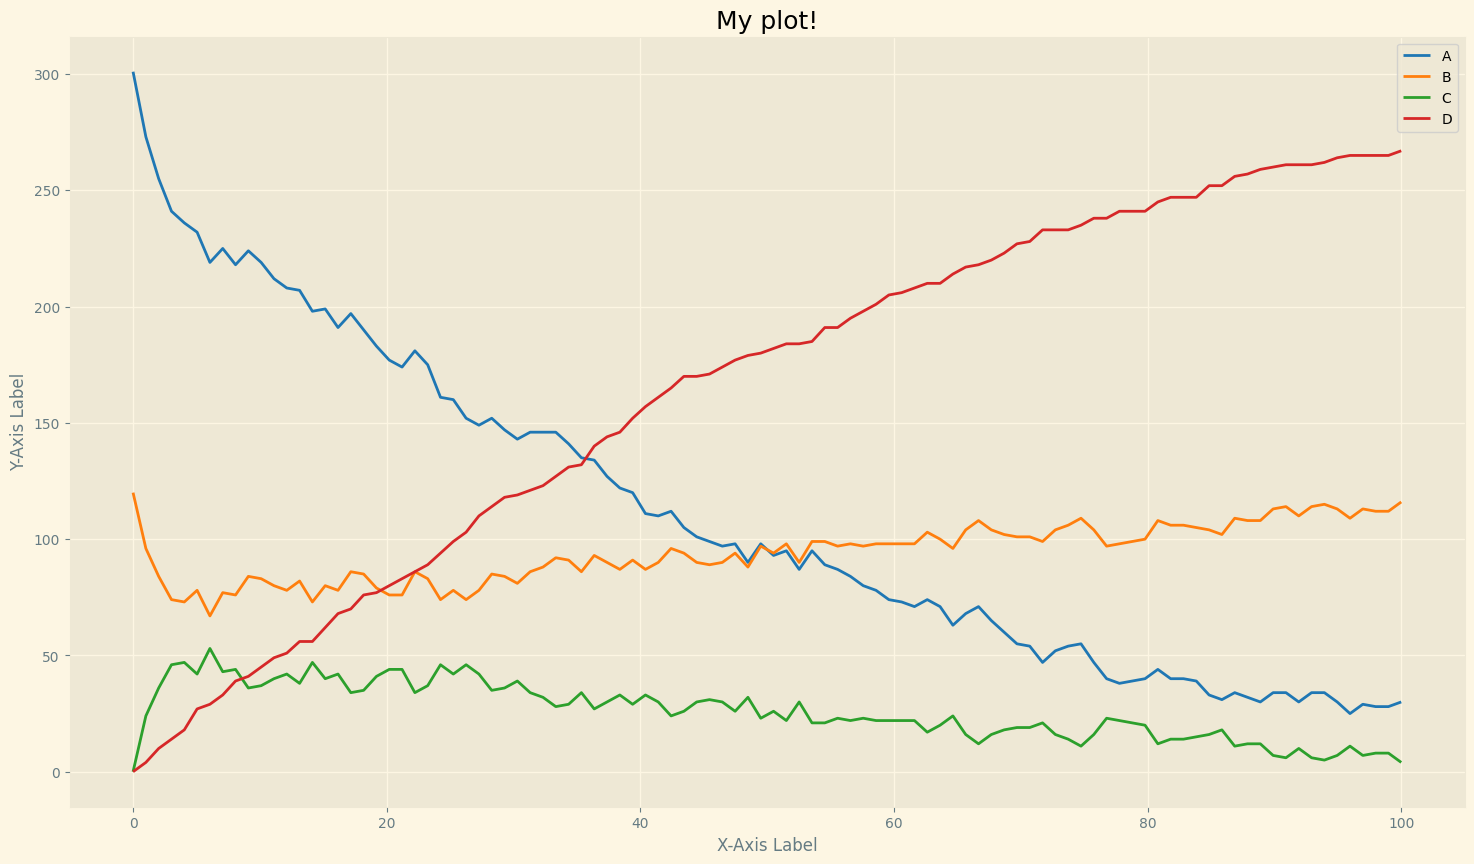

In [7]:
results.plot(
	# Set the title of the X and Y axis.
	xaxis_label="X-Axis Label",
	yaxis_label="Y-Axis Label", 

	# Set the title of the plot.
	title="My plot!",

	# Set to True to show the legend, False to hide it.
	show_legend=True,

	# Set to True to show a graph for each simulation trajectory, False for just one.
	multiple_graphs=False,

	# Set to the name of a matplotlib stylesheet. More designs can be found at the following link:
	# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
	style="Solarize_Light2"
)

### A more complete list of `results.plot()` arguments can be found [in the documentation](https://stochss.github.io/GillesPy2/classes/gillespy2.core.html#gillespy2.core.results.Results.plot).

### GillesPy2 also offers built-in plotly and statistical data plotting. You can view these functions in the [`Results` module documentation](https://stochss.github.io/GillesPy2/classes/gillespy2.core.html#module-gillespy2.core.results).

***
## Hybrid - Advanced
***
Some of the solvers in GillesPy2 provide further options for customizing simulations.  For examples on how to use these advanced features, please see the following links:  

[Hybrid: Using Rate Rules to model continuous species](./AdvancedFeatures/hybrid_continuous_species.ipynb)  
[Hybrid: Dynamically switching between stochastic and deterministic representations](./AdvancedFeatures/hybrid_switching_example.ipynb)  

***
## Where to go now?
***
For further examples on visualizing various data from the results follow the below link:  

[Data Visualization](./DataVisualization.ipynb)

For examples on exporting data to CSV or Pickle files follow the below link:

[Results Management](./ResultsManagement.ipynb)